In [148]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# Load cleaned datasets into DataFrames
df_aqi = pd.read_csv('C:/Users/mattl/cleaned_AQI_and_Lat_Long_of_Countries.csv')
df_weather = pd.read_csv('C:/Users/mattl/cleaned_daily_weather_data')
df_wikipedia_aqi = pd.read_csv('C:/Users/mattl/cleaned_wikipedia_aqi')

In [150]:
# Create SQLite database and load DataFrames into it
conn = sqlite3.connect('my_database.db')
df_aqi.to_sql('aqi_table', conn, index=False, if_exists='replace')
df_weather.to_sql('weather_table', conn, index=False, if_exists='replace')
df_wikipedia_aqi.to_sql('wikipedia_aqi_table', conn, index=False, if_exists='replace')


14

In [151]:
# Read the merged data from the database into a DataFrame
query = '''
SELECT *
FROM aqi_table c
JOIN weather_table w ON c.City = w.City
'''
merged_df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

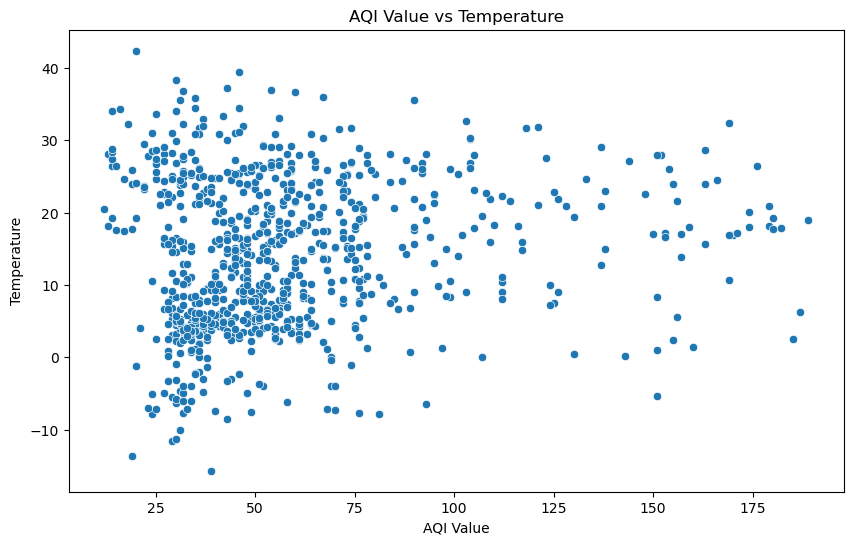

In [156]:
# Visualization 1: Scatter plot of AQI_Value vs Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AQI_Value', y='Temperature', data=merged_df)
plt.title('AQI Value vs Temperature')
plt.xlabel('AQI Value')
plt.ylabel('Temperature')
plt.show()


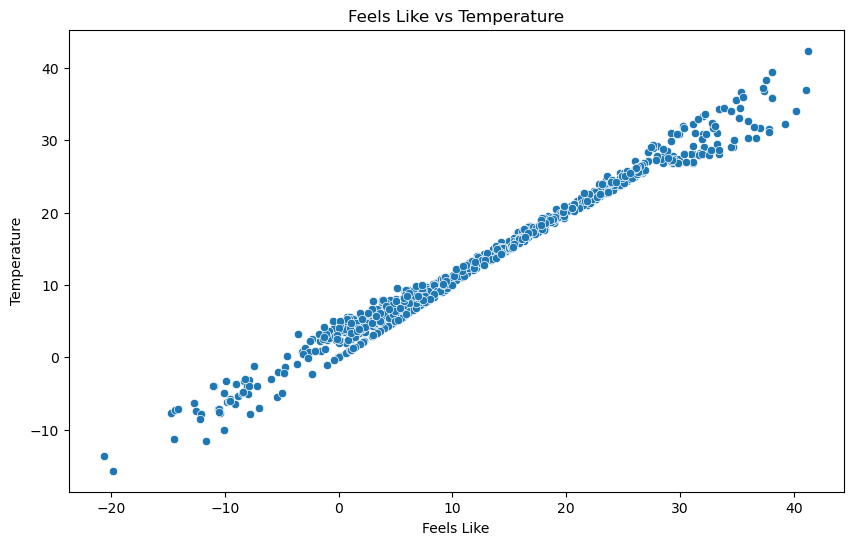

In [158]:
# Visualization 2: Bar plot of AQI categories by Country
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feels Like', y='Temperature', data=merged_df)
plt.title('Feels Like vs Temperature')
plt.xlabel('Feels Like')
plt.ylabel('Temperature')
plt.show()


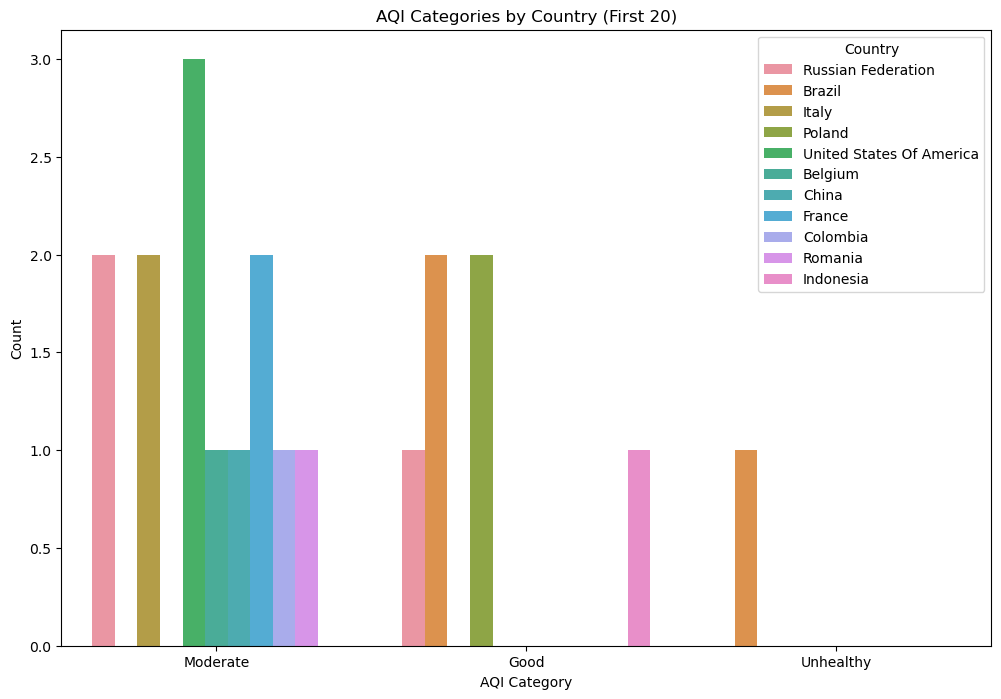

In [162]:
# Select the first 10 countries
merged_df_first_20 = merged_df.head(20)

# Visualization 3: Bar plot of AQI categories by Country (first 10 countries)
plt.figure(figsize=(12, 8))
sns.countplot(x='AQI_Category', hue='Country', data=merged_df_first_20)
plt.title('AQI Categories by Country (First 20)')
plt.xlabel('AQI Category')
plt.ylabel('Count')
plt.legend(title='Country')
plt.show()

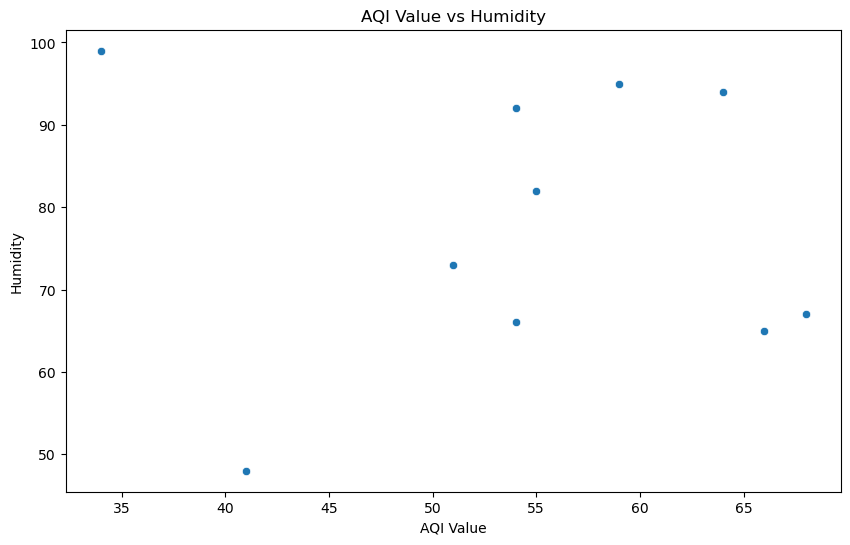

In [163]:
# Visualization 4: Scatter plot of AQI_Value vs Humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AQI_Value', y='Humidity', data=merged_df_first_100)
plt.title('AQI Value vs Humidity')
plt.xlabel('AQI Value')
plt.ylabel('Humidity')
plt.show()

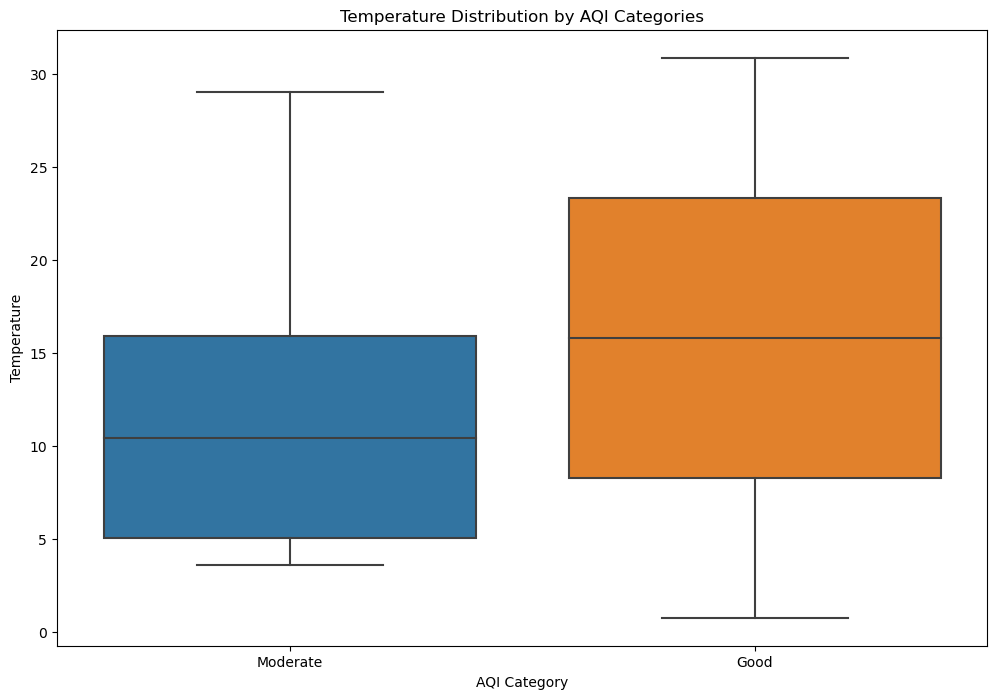

In [164]:
# Visualization 5: Box plot of Temperature by AQI categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='AQI_Category', y='Temperature', data=merged_df_first_100)
plt.title('Temperature Distribution by AQI Categories')
plt.xlabel('AQI Category')
plt.ylabel('Temperature')
plt.show()

Data Merging and Visualization Project

In this project, I embarked on a data merging and visualization task using three datasets related to Air Quality Index (AQI), daily weather, and additional information from Wikipedia. The goal was to clean, merge, and analyze the data, and then create meaningful visualizations to gain insights into the relationships between various parameters.

Data Cleaning and Merging

The initial phase involved loading the datasets into an SQLite database, allowing for efficient querying and merging of the datasets using SQL. The datasets were cleaned to handle missing values, standardize column names, and ensure consistency across the tables. The merging process was performed based on common columns such as City and Country, resulting in a consolidated dataset for further analysis.

Reflection and Ethical Implications

Throughout the project, ethical considerations played a crucial role. Handling personal and environmental data requires a commitment to privacy and responsible data usage. Ensuring the anonymization of sensitive information and abiding by relevant data protection laws is paramount. Additionally, transparency in data cleansing methods and acknowledgment of potential biases in the dataset is crucial for maintaining ethical standards.

The project highlighted the importance of accurate and reliable data for making informed decisions, particularly in domains like air quality monitoring. Cleansing and merging data effectively contribute to the accuracy of analyses and subsequent visualizations, enabling stakeholders to derive meaningful insights.

In conclusion, this project served as a practical application of data cleaning, merging, and visualization techniques. Beyond the technical aspects, the project underscored the ethical responsibilities associated with handling diverse datasets, emphasizing the need for transparency, privacy, and an awareness of potential biases.